In [1]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# reading data from csv's

test_cols = ['timestamp','robot_id','robot_a_id','robot_b_id','robot_a_alive','robot_b_alive','leader','trigger','i_detected','is_election','robots_ids','proposed_leader']
types = {'timestamp':int,'robot_id':int,'robot_a_id':int,'robot_b_id':int,'robot_a_alive':int,'robot_b_alive':int,'leader':int,'trigger':int,'i_detected':int,'is_election':int,'robots_ids':str,'proposed_leader':str}

robot_1 = pd.read_csv('test_r1.csv', usecols=test_cols, dtype=types)
robot_1['timestamp'] = robot_1['timestamp'].apply(lambda x: pd.to_datetime(round(x),unit='ms'))

robot_2 = pd.read_csv('test_r2.csv', usecols=test_cols, dtype=types)
robot_2['timestamp'] = robot_2['timestamp'].apply(lambda x: pd.to_datetime(round(x),unit='ms'))

robot_3 = pd.read_csv('test_r3.csv', usecols=test_cols, dtype=types)
robot_3['timestamp'] = robot_3['timestamp'].apply(lambda x: pd.to_datetime(round(x),unit='ms'))


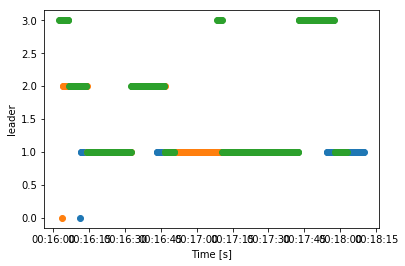

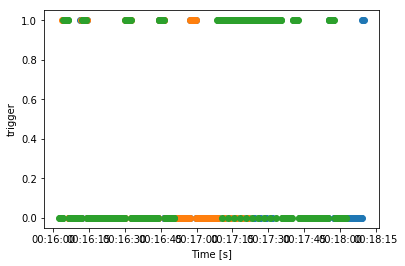

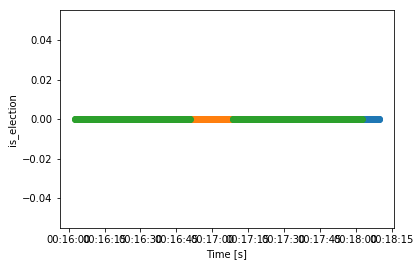

In [3]:
# first plots to 

def plot_col(col_title):
    plt.figure()
    draw = 'o'
    #if (col_title == 'trigger'):
        #draw = '-'
    plt.plot(robot_1['timestamp'], robot_1[col_title],draw)
    plt.plot(robot_2['timestamp'], robot_2[col_title],draw)
    plt.plot(robot_3['timestamp'], robot_3[col_title],draw)
    plt.xlabel('Time [s]')
    plt.ylabel(col_title)
    fig_name = 'figures/'+col_title+'.png'
    plt.savefig(fig_name,format='png',dpi=500)

plot_col('leader')
plot_col('trigger')
plot_col('is_election')

# OBSERVATIONS:

# notice that 'is_election' is a variable used internally in the code,
# useful for knowing when to stop proposing leaders, but is so fast
# that is never detected when storing the data. It is useless in this case.

# It is easy to see who is the leader in each case.

# It is easy to see every time the election process was triggered.

# However, in both cases ('leader' and 'trigger') it is hard to see which -> solved: circles instead of lines
# robots are alive or not. Sometimes the ramps seen in the plots indicate
# that during the time of the ramp, that robot was off. But in other cases
# the value stays the same and then it is shown as a straight line.

Text(0, 0.5, 'Alive r2 (b), r3 (o)')

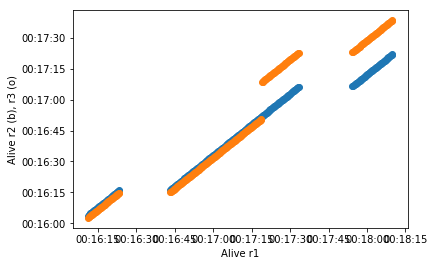

In [4]:
# first attempt to see that not all robots where turned on all the time

plt.figure()
plt.plot(robot_1['timestamp'], robot_2['timestamp'][:314],'o')
plt.plot(robot_1['timestamp'], robot_3['timestamp'][:314],'o')
#plt.plot(robot_2['timestamp'][:314], robot_3['timestamp'][:314])

plt.xlabel('Alive r1')
plt.ylabel('Alive r2 (b), r3 (o)')

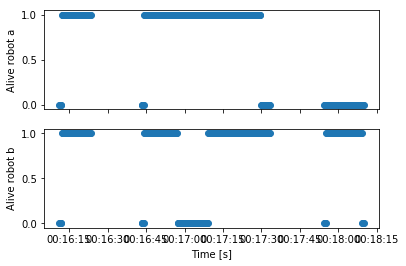

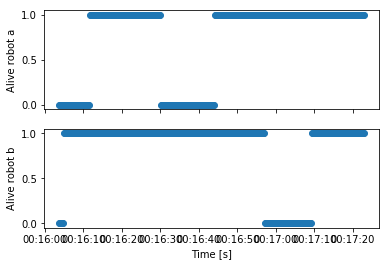

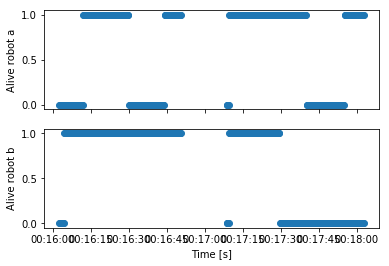

In [5]:
# plotting alive signals from all robots
def plot_alive(robot):
    plt.figure()
    ax1 = plt.subplot(211)
    plt.plot(robot['timestamp'], robot['robot_a_alive'],'o')
    plt.setp(ax1.get_xticklabels(), visible=False)#fontsize=6)
    plt.ylabel('Alive robot a')

    ax2 = plt.subplot(212)
    plt.plot(robot['timestamp'], robot['robot_b_alive'],'o')
    plt.ylabel('Alive robot b')
    plt.xlabel('Time [s]')

plot_alive(robot_1)
plot_alive(robot_2)
plot_alive(robot_3)

In [6]:
# 
r1 = robot_1
r2 = robot_2
r3 = robot_3

r1.head()
r2.head()
#r3.head()

,timestamp,robot_id,robot_a_id,robot_b_id,robot_a_alive,robot_b_alive,leader,trigger,i_detected,is_election,robots_ids,proposed_leader
0,2019-06-23 00:16:03.727,2,1,3,0,0,0,1,0,0,NaN,NaN
1,2019-06-23 00:16:03.977,2,1,3,0,0,2,1,1,0,2,NaN
2,2019-06-23 00:16:04.227,2,1,3,0,0,2,1,1,0,2,2
3,2019-06-23 00:16:04.477,2,1,3,0,0,2,1,1,0,2,2
4,2019-06-23 00:16:04.728,2,1,3,0,0,2,1,1,0,2;3,2


In [7]:
# selecting and renaming columns to merge all in one dataframe

r1 = r1.drop(columns=['robot_a_id','robot_b_id','is_election','robots_ids','proposed_leader'])
r1.rename(columns={'robot_id': 'alive_r1', 'robot_a_alive': 'alive_r2', 'robot_b_alive': 'alive_r3'}, inplace=True)
r1.head()

r2 = r2.drop(columns=['robot_a_id','robot_b_id','is_election','robots_ids','proposed_leader'])
r2.rename(columns={'robot_id': 'alive_r2', 'robot_a_alive': 'alive_r1', 'robot_b_alive': 'alive_r3'}, inplace=True)
r2.head()

r3 = r3.drop(columns=['robot_a_id','robot_b_id','is_election','robots_ids','proposed_leader'])
r3.rename(columns={'robot_id': 'alive_r1', 'robot_a_alive': 'alive_r2', 'robot_b_alive': 'alive_r3'}, inplace=True)
r3.head()

,timestamp,alive_r1,alive_r2,alive_r3,leader,trigger,i_detected
0,2019-06-23 00:16:02.575,3,0,0,3,0,0
1,2019-06-23 00:16:02.826,3,0,0,3,0,0
2,2019-06-23 00:16:03.076,3,0,0,3,0,0
3,2019-06-23 00:16:03.326,3,0,0,3,0,0
4,2019-06-23 00:16:03.577,3,0,0,3,0,0


In [8]:
# merging all in one
r1.set_index('timestamp')
r2.set_index('timestamp')
r3.set_index('timestamp')

pd.merge(A_df, B_df,  how='left', left_on=['A_c1','c2'], right_on = ['B_c1','c2'])
#r1.join(r2, how='outer')
#robots.merge(r2, how='outer', on='timestamp', left_index=True, sort=True, suffixes=('_1', '_2'), copy=True, indicator=True, validate=None)

ValueError: columns overlap but no suffix specified: Index(['timestamp', 'alive_r1', 'alive_r2', 'alive_r3', 'leader', 'trigger',
       'i_detected'],
      dtype='object')